# 19장 세상에 없는 얼굴 GAN, 오토인코더

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch19-colab.ipynb)

## 3. 적대적 신경망 실행하기

### 실습: GAN 모델 만들기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False  
# 판별자의 변경된 가중치는 생성자의 가중치를 업데이트 하는데 활용
# 판별자 자신이 학습되지는 않음 

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


1/1 [==============================] - 0s 135ms/step
epoch:0  d_loss:0.7432  g_loss:0.5489
1/1 [==============================] - 0s 15ms/step
epoch:1  d_loss:0.5413  g_loss:0.2766
1/1 [==============================] - 0s 16ms/step
epoch:2  d_loss:0.4912  g_loss:0.1251
1/1 [==============================] - 0s 15ms/step
epoch:3  d_loss:0.4682  g_loss:0.0792
1/1 [==============================] - 0s 15ms/step
epoch:4  d_loss:0.4646  g_loss:0.0828
1/1 [==============================] - 0s 15ms/step
epoch:5  d_loss:0.4503  g_loss:0.1102
1/1 [==============================] - 0s 15ms/step
epoch:6  d_loss:0.4438  g_loss:0.1613
1/1 [==============================] - 0s 15ms/step
epoch:7  d_loss:0.4415  g_loss:0.2349
1/1 [==============================] - 0s 15ms/step
epoch:8  d_loss:0.4559  g_loss:0.3119
1/1 [==============================] - 0s 15ms/step
epoch:9  d_loss:0.4484  g_loss:0.3535
1/1 [==============================] - 0s 15ms/step
epoch:10  d_loss:0.4430  g_loss:0.4011
1/1 [===

epoch:89  d_loss:0.4413  g_loss:1.6995
1/1 [==============================] - 0s 15ms/step
epoch:90  d_loss:0.3890  g_loss:1.6315
1/1 [==============================] - 0s 15ms/step
epoch:91  d_loss:0.3656  g_loss:1.6781
1/1 [==============================] - 0s 15ms/step
epoch:92  d_loss:0.3469  g_loss:1.4114
1/1 [==============================] - 0s 15ms/step
epoch:93  d_loss:0.3525  g_loss:1.3188
1/1 [==============================] - 0s 15ms/step
epoch:94  d_loss:0.3873  g_loss:1.5035
1/1 [==============================] - 0s 15ms/step
epoch:95  d_loss:0.3447  g_loss:1.6986
1/1 [==============================] - 0s 15ms/step
epoch:96  d_loss:0.3729  g_loss:1.6011
1/1 [==============================] - 0s 16ms/step
epoch:97  d_loss:0.4155  g_loss:1.6146
1/1 [==============================] - 0s 16ms/step
epoch:98  d_loss:0.5533  g_loss:1.4665
1/1 [==============================] - 0s 15ms/step
epoch:99  d_loss:0.4560  g_loss:1.3879
1/1 [==============================] - 0s 15ms/step

1/1 [==============================] - 0s 15ms/step
epoch:179  d_loss:0.5192  g_loss:1.8297
1/1 [==============================] - 0s 14ms/step
epoch:180  d_loss:0.4783  g_loss:1.9609
1/1 [==============================] - 0s 15ms/step
epoch:181  d_loss:0.4823  g_loss:1.9077
1/1 [==============================] - 0s 15ms/step
epoch:182  d_loss:0.4722  g_loss:2.1211
1/1 [==============================] - 0s 15ms/step
epoch:183  d_loss:0.5980  g_loss:1.8809
1/1 [==============================] - 0s 15ms/step
epoch:184  d_loss:0.5182  g_loss:2.1294
1/1 [==============================] - 0s 15ms/step
epoch:185  d_loss:0.5355  g_loss:1.8524
1/1 [==============================] - 0s 16ms/step
epoch:186  d_loss:0.5432  g_loss:2.1414
1/1 [==============================] - 0s 14ms/step
epoch:187  d_loss:0.5690  g_loss:2.2553
1/1 [==============================] - 0s 15ms/step
epoch:188  d_loss:0.5814  g_loss:2.3720
1/1 [==============================] - 0s 15ms/step
epoch:189  d_loss:0.7714  g_

1/1 [==============================] - 0s 15ms/step
epoch:267  d_loss:0.5712  g_loss:1.9876
1/1 [==============================] - 0s 15ms/step
epoch:268  d_loss:0.5834  g_loss:1.7014
1/1 [==============================] - 0s 15ms/step
epoch:269  d_loss:0.6076  g_loss:1.6213
1/1 [==============================] - 0s 14ms/step
epoch:270  d_loss:0.6519  g_loss:1.7137
1/1 [==============================] - 0s 16ms/step
epoch:271  d_loss:0.5029  g_loss:1.8480
1/1 [==============================] - 0s 15ms/step
epoch:272  d_loss:0.3979  g_loss:1.8432
1/1 [==============================] - 0s 15ms/step
epoch:273  d_loss:0.3970  g_loss:1.9183
1/1 [==============================] - 0s 14ms/step
epoch:274  d_loss:0.3324  g_loss:2.1039
1/1 [==============================] - 0s 15ms/step
epoch:275  d_loss:0.2455  g_loss:1.8640
1/1 [==============================] - 0s 14ms/step
epoch:276  d_loss:0.2689  g_loss:1.8548
1/1 [==============================] - 0s 15ms/step
epoch:277  d_loss:0.2578  g_

1/1 [==============================] - 0s 15ms/step
epoch:356  d_loss:0.3089  g_loss:2.7328
1/1 [==============================] - 0s 16ms/step
epoch:357  d_loss:0.3132  g_loss:2.5697
1/1 [==============================] - 0s 15ms/step
epoch:358  d_loss:0.3209  g_loss:2.6765
1/1 [==============================] - 0s 15ms/step
epoch:359  d_loss:0.2792  g_loss:2.2229
1/1 [==============================] - 0s 16ms/step
epoch:360  d_loss:0.3220  g_loss:2.3094
1/1 [==============================] - 0s 15ms/step
epoch:361  d_loss:0.2559  g_loss:2.3966
1/1 [==============================] - 0s 15ms/step
epoch:362  d_loss:0.3364  g_loss:2.0457
1/1 [==============================] - 0s 15ms/step
epoch:363  d_loss:0.2657  g_loss:2.2953
1/1 [==============================] - 0s 15ms/step
epoch:364  d_loss:0.3040  g_loss:2.9432
1/1 [==============================] - 0s 15ms/step
epoch:365  d_loss:0.4265  g_loss:2.4239
1/1 [==============================] - 0s 14ms/step
epoch:366  d_loss:0.3337  g_

1/1 [==============================] - 0s 16ms/step
epoch:444  d_loss:0.2081  g_loss:2.8085
1/1 [==============================] - 0s 15ms/step
epoch:445  d_loss:0.2519  g_loss:2.9694
1/1 [==============================] - 0s 14ms/step
epoch:446  d_loss:0.1918  g_loss:2.8199
1/1 [==============================] - 0s 16ms/step
epoch:447  d_loss:0.2751  g_loss:2.5955
1/1 [==============================] - 0s 15ms/step
epoch:448  d_loss:0.2809  g_loss:1.8257
1/1 [==============================] - 0s 14ms/step
epoch:449  d_loss:0.3158  g_loss:2.0830
1/1 [==============================] - 0s 15ms/step
epoch:450  d_loss:0.2183  g_loss:2.4918
1/1 [==============================] - 0s 15ms/step
epoch:451  d_loss:0.2892  g_loss:2.5654
1/1 [==============================] - 0s 15ms/step
epoch:452  d_loss:0.3114  g_loss:2.1119
1/1 [==============================] - 0s 14ms/step
epoch:453  d_loss:0.2664  g_loss:2.1191
1/1 [==============================] - 0s 15ms/step
epoch:454  d_loss:0.2540  g_

1/1 [==============================] - 0s 16ms/step
epoch:533  d_loss:0.1791  g_loss:3.7068
1/1 [==============================] - 0s 15ms/step
epoch:534  d_loss:0.2582  g_loss:3.3336
1/1 [==============================] - 0s 15ms/step
epoch:535  d_loss:0.2979  g_loss:2.8881
1/1 [==============================] - 0s 16ms/step
epoch:536  d_loss:0.2912  g_loss:3.1423
1/1 [==============================] - 0s 16ms/step
epoch:537  d_loss:0.2620  g_loss:3.8548
1/1 [==============================] - 0s 17ms/step
epoch:538  d_loss:0.1930  g_loss:3.9473
1/1 [==============================] - 0s 16ms/step
epoch:539  d_loss:0.2201  g_loss:3.7017
1/1 [==============================] - 0s 16ms/step
epoch:540  d_loss:0.1858  g_loss:3.5716
1/1 [==============================] - 0s 15ms/step
epoch:541  d_loss:0.2424  g_loss:2.6525
1/1 [==============================] - 0s 15ms/step
epoch:542  d_loss:0.2087  g_loss:2.5549
1/1 [==============================] - 0s 16ms/step
epoch:543  d_loss:0.1739  g_

1/1 [==============================] - 0s 17ms/step
epoch:621  d_loss:0.1603  g_loss:3.1607
1/1 [==============================] - 0s 14ms/step
epoch:622  d_loss:0.4188  g_loss:3.2134
1/1 [==============================] - 0s 15ms/step
epoch:623  d_loss:0.5777  g_loss:2.0075
1/1 [==============================] - 0s 14ms/step
epoch:624  d_loss:0.4689  g_loss:1.2044
1/1 [==============================] - 0s 15ms/step
epoch:625  d_loss:0.4093  g_loss:1.5961
1/1 [==============================] - 0s 16ms/step
epoch:626  d_loss:0.3630  g_loss:1.2863
1/1 [==============================] - 0s 15ms/step
epoch:627  d_loss:0.3678  g_loss:1.5862
1/1 [==============================] - 0s 14ms/step
epoch:628  d_loss:0.4526  g_loss:1.7546
1/1 [==============================] - 0s 16ms/step
epoch:629  d_loss:0.5867  g_loss:1.5190
1/1 [==============================] - 0s 15ms/step
epoch:630  d_loss:0.4346  g_loss:1.3092
1/1 [==============================] - 0s 14ms/step
epoch:631  d_loss:0.5207  g_

1/1 [==============================] - 0s 16ms/step
epoch:710  d_loss:0.6859  g_loss:1.6343
1/1 [==============================] - 0s 16ms/step
epoch:711  d_loss:0.4005  g_loss:1.7861
1/1 [==============================] - 0s 15ms/step
epoch:712  d_loss:0.5030  g_loss:1.6284
1/1 [==============================] - 0s 16ms/step
epoch:713  d_loss:0.4043  g_loss:1.8783
1/1 [==============================] - 0s 14ms/step
epoch:714  d_loss:0.4887  g_loss:1.8096
1/1 [==============================] - 0s 15ms/step
epoch:715  d_loss:0.4714  g_loss:1.9638
1/1 [==============================] - 0s 14ms/step
epoch:716  d_loss:0.4348  g_loss:2.0251
1/1 [==============================] - 0s 15ms/step
epoch:717  d_loss:0.3880  g_loss:2.1233
1/1 [==============================] - 0s 15ms/step
epoch:718  d_loss:0.4188  g_loss:2.4510
1/1 [==============================] - 0s 15ms/step
epoch:719  d_loss:0.3548  g_loss:1.9882
1/1 [==============================] - 0s 16ms/step
epoch:720  d_loss:0.6400  g_

1/1 [==============================] - 0s 15ms/step
epoch:799  d_loss:0.4763  g_loss:1.4694
1/1 [==============================] - 0s 14ms/step
epoch:800  d_loss:0.5574  g_loss:1.2831
1/1 [==============================] - 0s 15ms/step
epoch:801  d_loss:0.5217  g_loss:1.8065
1/1 [==============================] - 0s 15ms/step
epoch:802  d_loss:0.4330  g_loss:1.3677
1/1 [==============================] - 0s 14ms/step
epoch:803  d_loss:0.5628  g_loss:1.5467
1/1 [==============================] - 0s 15ms/step
epoch:804  d_loss:0.4713  g_loss:1.5685
1/1 [==============================] - 0s 15ms/step
epoch:805  d_loss:0.6249  g_loss:1.3204
1/1 [==============================] - 0s 16ms/step
epoch:806  d_loss:0.4927  g_loss:1.3809
1/1 [==============================] - 0s 16ms/step
epoch:807  d_loss:0.5300  g_loss:1.4225
1/1 [==============================] - 0s 14ms/step
epoch:808  d_loss:0.4415  g_loss:1.4080
1/1 [==============================] - 0s 16ms/step
epoch:809  d_loss:0.5922  g_

1/1 [==============================] - 0s 15ms/step
epoch:887  d_loss:0.3792  g_loss:2.3775
1/1 [==============================] - 0s 15ms/step
epoch:888  d_loss:0.3023  g_loss:2.8582
1/1 [==============================] - 0s 15ms/step
epoch:889  d_loss:0.3358  g_loss:2.4223
1/1 [==============================] - 0s 14ms/step
epoch:890  d_loss:0.3429  g_loss:2.5809
1/1 [==============================] - 0s 15ms/step
epoch:891  d_loss:0.3460  g_loss:2.6151
1/1 [==============================] - 0s 15ms/step
epoch:892  d_loss:0.2837  g_loss:2.4681
1/1 [==============================] - 0s 15ms/step
epoch:893  d_loss:0.2194  g_loss:2.5865
1/1 [==============================] - 0s 15ms/step
epoch:894  d_loss:0.2759  g_loss:2.4291
1/1 [==============================] - 0s 16ms/step
epoch:895  d_loss:0.3525  g_loss:2.3177
1/1 [==============================] - 0s 14ms/step
epoch:896  d_loss:0.4208  g_loss:2.5174
1/1 [==============================] - 0s 15ms/step
epoch:897  d_loss:0.2880  g_

1/1 [==============================] - 0s 15ms/step
epoch:976  d_loss:0.3964  g_loss:1.8829
1/1 [==============================] - 0s 16ms/step
epoch:977  d_loss:0.5515  g_loss:2.1318
1/1 [==============================] - 0s 15ms/step
epoch:978  d_loss:0.2195  g_loss:2.2495
1/1 [==============================] - 0s 16ms/step
epoch:979  d_loss:0.3851  g_loss:2.4886
1/1 [==============================] - 0s 15ms/step
epoch:980  d_loss:0.3125  g_loss:2.8279
1/1 [==============================] - 0s 15ms/step
epoch:981  d_loss:0.3224  g_loss:2.7428
1/1 [==============================] - 0s 16ms/step
epoch:982  d_loss:0.3770  g_loss:2.3189
1/1 [==============================] - 0s 15ms/step
epoch:983  d_loss:0.4801  g_loss:1.6179
1/1 [==============================] - 0s 16ms/step
epoch:984  d_loss:0.3076  g_loss:2.0686
1/1 [==============================] - 0s 15ms/step
epoch:985  d_loss:0.4607  g_loss:2.1132
1/1 [==============================] - 0s 15ms/step
epoch:986  d_loss:0.4951  g_

1/1 [==============================] - 0s 16ms/step
epoch:1064  d_loss:0.3980  g_loss:2.0882
1/1 [==============================] - 0s 15ms/step
epoch:1065  d_loss:0.5266  g_loss:1.9427
1/1 [==============================] - 0s 15ms/step
epoch:1066  d_loss:0.4391  g_loss:1.8460
1/1 [==============================] - 0s 16ms/step
epoch:1067  d_loss:0.3152  g_loss:2.1875
1/1 [==============================] - 0s 16ms/step
epoch:1068  d_loss:0.4355  g_loss:1.6116
1/1 [==============================] - 0s 15ms/step
epoch:1069  d_loss:0.4006  g_loss:2.0068
1/1 [==============================] - 0s 16ms/step
epoch:1070  d_loss:0.4339  g_loss:1.7844
1/1 [==============================] - 0s 16ms/step
epoch:1071  d_loss:0.3881  g_loss:1.8659
1/1 [==============================] - 0s 15ms/step
epoch:1072  d_loss:0.3373  g_loss:1.8924
1/1 [==============================] - 0s 15ms/step
epoch:1073  d_loss:0.4733  g_loss:2.0496
1/1 [==============================] - 0s 15ms/step
epoch:1074  d_loss

1/1 [==============================] - 0s 14ms/step
epoch:1152  d_loss:0.2572  g_loss:2.7302
1/1 [==============================] - 0s 14ms/step
epoch:1153  d_loss:0.3319  g_loss:1.8817
1/1 [==============================] - 0s 15ms/step
epoch:1154  d_loss:0.3162  g_loss:2.5276
1/1 [==============================] - 0s 16ms/step
epoch:1155  d_loss:0.2712  g_loss:2.6902
1/1 [==============================] - 0s 16ms/step
epoch:1156  d_loss:0.2359  g_loss:2.6655
1/1 [==============================] - 0s 16ms/step
epoch:1157  d_loss:0.4618  g_loss:2.6349
1/1 [==============================] - 0s 16ms/step
epoch:1158  d_loss:0.2979  g_loss:2.8428
1/1 [==============================] - 0s 16ms/step
epoch:1159  d_loss:0.3118  g_loss:2.8392
1/1 [==============================] - 0s 16ms/step
epoch:1160  d_loss:0.3836  g_loss:2.2809
1/1 [==============================] - 0s 14ms/step
epoch:1161  d_loss:0.3479  g_loss:2.2440
1/1 [==============================] - 0s 16ms/step
epoch:1162  d_loss

epoch:1239  d_loss:0.3872  g_loss:2.5929
1/1 [==============================] - 0s 14ms/step
epoch:1240  d_loss:0.2666  g_loss:2.7323
1/1 [==============================] - 0s 15ms/step
epoch:1241  d_loss:0.4748  g_loss:1.5319
1/1 [==============================] - 0s 15ms/step
epoch:1242  d_loss:0.3481  g_loss:1.6152
1/1 [==============================] - 0s 15ms/step
epoch:1243  d_loss:0.4081  g_loss:2.0756
1/1 [==============================] - 0s 15ms/step
epoch:1244  d_loss:0.2290  g_loss:2.4633
1/1 [==============================] - 0s 14ms/step
epoch:1245  d_loss:0.3758  g_loss:2.5596
1/1 [==============================] - 0s 16ms/step
epoch:1246  d_loss:0.3866  g_loss:2.6914
1/1 [==============================] - 0s 16ms/step
epoch:1247  d_loss:0.2999  g_loss:2.8604
1/1 [==============================] - 0s 15ms/step
epoch:1248  d_loss:0.2887  g_loss:2.0709
1/1 [==============================] - 0s 15ms/step
epoch:1249  d_loss:0.4158  g_loss:1.7657
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1328  d_loss:0.3628  g_loss:1.6770
1/1 [==============================] - 0s 14ms/step
epoch:1329  d_loss:0.2616  g_loss:1.8107
1/1 [==============================] - 0s 17ms/step
epoch:1330  d_loss:0.2958  g_loss:1.6638
1/1 [==============================] - 0s 15ms/step
epoch:1331  d_loss:0.3533  g_loss:1.6645
1/1 [==============================] - 0s 15ms/step
epoch:1332  d_loss:0.4071  g_loss:1.9114
1/1 [==============================] - 0s 14ms/step
epoch:1333  d_loss:0.3902  g_loss:1.8380
1/1 [==============================] - 0s 16ms/step
epoch:1334  d_loss:0.3065  g_loss:1.8286
1/1 [==============================] - 0s 16ms/step
epoch:1335  d_loss:0.3916  g_loss:1.8550
1/1 [==============================] - 0s 15ms/step
epoch:1336  d_loss:0.3890  g_loss:1.7461
1/1 [==============================] - 0s 15ms/step
epoch:1337  d_loss:0.3786  g_loss:1.7540
1/1 [==============================] - 0s 14ms/step
epoch:1338  d_loss

epoch:1415  d_loss:0.3706  g_loss:2.0070
1/1 [==============================] - 0s 15ms/step
epoch:1416  d_loss:0.4337  g_loss:1.6868
1/1 [==============================] - 0s 15ms/step
epoch:1417  d_loss:0.4537  g_loss:1.6315
1/1 [==============================] - 0s 16ms/step
epoch:1418  d_loss:0.4397  g_loss:2.0620
1/1 [==============================] - 0s 16ms/step
epoch:1419  d_loss:0.3940  g_loss:1.6939
1/1 [==============================] - 0s 15ms/step
epoch:1420  d_loss:0.3328  g_loss:1.8781
1/1 [==============================] - 0s 16ms/step
epoch:1421  d_loss:0.3011  g_loss:2.0547
1/1 [==============================] - 0s 15ms/step
epoch:1422  d_loss:0.4487  g_loss:1.8549
1/1 [==============================] - 0s 15ms/step
epoch:1423  d_loss:0.4678  g_loss:1.8309
1/1 [==============================] - 0s 15ms/step
epoch:1424  d_loss:0.4399  g_loss:1.9555
1/1 [==============================] - 0s 14ms/step
epoch:1425  d_loss:0.3898  g_loss:1.5587
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1504  d_loss:0.5349  g_loss:1.6144
1/1 [==============================] - 0s 15ms/step
epoch:1505  d_loss:0.4583  g_loss:1.9078
1/1 [==============================] - 0s 16ms/step
epoch:1506  d_loss:0.5923  g_loss:1.7897
1/1 [==============================] - 0s 14ms/step
epoch:1507  d_loss:0.6074  g_loss:1.9357
1/1 [==============================] - 0s 16ms/step
epoch:1508  d_loss:0.5120  g_loss:1.5849
1/1 [==============================] - 0s 16ms/step
epoch:1509  d_loss:0.5808  g_loss:1.6166
1/1 [==============================] - 0s 16ms/step
epoch:1510  d_loss:0.4531  g_loss:1.6100
1/1 [==============================] - 0s 15ms/step
epoch:1511  d_loss:0.4833  g_loss:1.8700
1/1 [==============================] - 0s 15ms/step
epoch:1512  d_loss:0.4602  g_loss:1.7916
1/1 [==============================] - 0s 16ms/step
epoch:1513  d_loss:0.5177  g_loss:1.7042
1/1 [==============================] - 0s 16ms/step
epoch:1514  d_loss

1/1 [==============================] - 0s 14ms/step
epoch:1592  d_loss:0.4499  g_loss:1.2944
1/1 [==============================] - 0s 14ms/step
epoch:1593  d_loss:0.5093  g_loss:1.6678
1/1 [==============================] - 0s 15ms/step
epoch:1594  d_loss:0.4943  g_loss:1.5865
1/1 [==============================] - 0s 14ms/step
epoch:1595  d_loss:0.4850  g_loss:1.4425
1/1 [==============================] - 0s 15ms/step
epoch:1596  d_loss:0.4136  g_loss:1.6015
1/1 [==============================] - 0s 15ms/step
epoch:1597  d_loss:0.6464  g_loss:1.4777
1/1 [==============================] - 0s 15ms/step
epoch:1598  d_loss:0.6071  g_loss:1.4283
1/1 [==============================] - 0s 15ms/step
epoch:1599  d_loss:0.5281  g_loss:1.5119
1/1 [==============================] - 0s 15ms/step
epoch:1600  d_loss:0.6009  g_loss:2.0377
1/1 [==============================] - 0s 14ms/step
epoch:1601  d_loss:0.6122  g_loss:1.3759
1/1 [==============================] - 0s 15ms/step
epoch:1602  d_loss

epoch:1679  d_loss:0.4415  g_loss:2.0577
1/1 [==============================] - 0s 16ms/step
epoch:1680  d_loss:0.3921  g_loss:2.2136
1/1 [==============================] - 0s 15ms/step
epoch:1681  d_loss:0.4390  g_loss:2.1482
1/1 [==============================] - 0s 15ms/step
epoch:1682  d_loss:0.3810  g_loss:2.0407
1/1 [==============================] - 0s 14ms/step
epoch:1683  d_loss:0.5379  g_loss:1.6890
1/1 [==============================] - 0s 16ms/step
epoch:1684  d_loss:0.3908  g_loss:1.4228
1/1 [==============================] - 0s 16ms/step
epoch:1685  d_loss:0.4726  g_loss:1.4974
1/1 [==============================] - 0s 14ms/step
epoch:1686  d_loss:0.4720  g_loss:1.7893
1/1 [==============================] - 0s 15ms/step
epoch:1687  d_loss:0.3414  g_loss:1.9762
1/1 [==============================] - 0s 16ms/step
epoch:1688  d_loss:0.3858  g_loss:2.1253
1/1 [==============================] - 0s 17ms/step
epoch:1689  d_loss:0.5288  g_loss:1.6894
1/1 [========================

1/1 [==============================] - 0s 14ms/step
epoch:1768  d_loss:0.3872  g_loss:1.7677
1/1 [==============================] - 0s 15ms/step
epoch:1769  d_loss:0.5483  g_loss:1.4209
1/1 [==============================] - 0s 15ms/step
epoch:1770  d_loss:0.5208  g_loss:1.4107
1/1 [==============================] - 0s 15ms/step
epoch:1771  d_loss:0.4868  g_loss:1.7087
1/1 [==============================] - 0s 15ms/step
epoch:1772  d_loss:0.4867  g_loss:1.7149
1/1 [==============================] - 0s 15ms/step
epoch:1773  d_loss:0.5427  g_loss:1.8101
1/1 [==============================] - 0s 14ms/step
epoch:1774  d_loss:0.4432  g_loss:2.0829
1/1 [==============================] - 0s 14ms/step
epoch:1775  d_loss:0.4301  g_loss:1.5492
1/1 [==============================] - 0s 15ms/step
epoch:1776  d_loss:0.4389  g_loss:1.8568
1/1 [==============================] - 0s 15ms/step
epoch:1777  d_loss:0.3333  g_loss:1.7140
1/1 [==============================] - 0s 15ms/step
epoch:1778  d_loss

epoch:1855  d_loss:0.4514  g_loss:1.6154
1/1 [==============================] - 0s 16ms/step
epoch:1856  d_loss:0.5292  g_loss:1.3642
1/1 [==============================] - 0s 15ms/step
epoch:1857  d_loss:0.4151  g_loss:1.7296
1/1 [==============================] - 0s 15ms/step
epoch:1858  d_loss:0.5537  g_loss:1.5892
1/1 [==============================] - 0s 15ms/step
epoch:1859  d_loss:0.4049  g_loss:1.7763
1/1 [==============================] - 0s 15ms/step
epoch:1860  d_loss:0.5490  g_loss:1.7133
1/1 [==============================] - 0s 15ms/step
epoch:1861  d_loss:0.6519  g_loss:1.2876
1/1 [==============================] - 0s 15ms/step
epoch:1862  d_loss:0.5794  g_loss:1.4494
1/1 [==============================] - 0s 15ms/step
epoch:1863  d_loss:0.4573  g_loss:1.5445
1/1 [==============================] - 0s 15ms/step
epoch:1864  d_loss:0.5931  g_loss:1.3669
1/1 [==============================] - 0s 15ms/step
epoch:1865  d_loss:0.4864  g_loss:1.7873
1/1 [========================

1/1 [==============================] - 0s 14ms/step
epoch:1944  d_loss:0.4440  g_loss:1.7704
1/1 [==============================] - 0s 15ms/step
epoch:1945  d_loss:0.5541  g_loss:1.8459
1/1 [==============================] - 0s 15ms/step
epoch:1946  d_loss:0.5224  g_loss:1.4722
1/1 [==============================] - 0s 14ms/step
epoch:1947  d_loss:0.5062  g_loss:1.5626
1/1 [==============================] - 0s 15ms/step
epoch:1948  d_loss:0.5574  g_loss:1.5868
1/1 [==============================] - 0s 14ms/step
epoch:1949  d_loss:0.4669  g_loss:1.3638
1/1 [==============================] - 0s 15ms/step
epoch:1950  d_loss:0.4996  g_loss:1.6608
1/1 [==============================] - 0s 14ms/step
epoch:1951  d_loss:0.5094  g_loss:1.4269
1/1 [==============================] - 0s 15ms/step
epoch:1952  d_loss:0.5310  g_loss:1.4366
1/1 [==============================] - 0s 15ms/step
epoch:1953  d_loss:0.5076  g_loss:1.4172
1/1 [==============================] - 0s 16ms/step
epoch:1954  d_loss

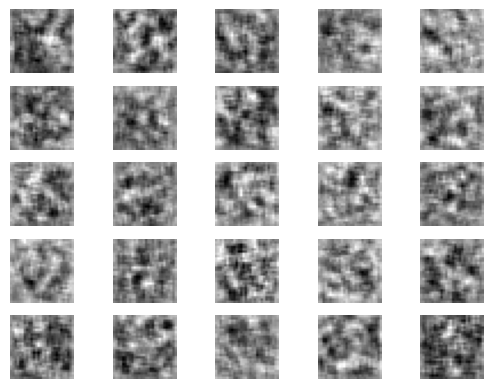

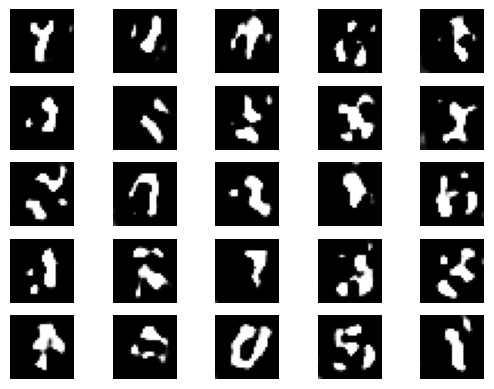

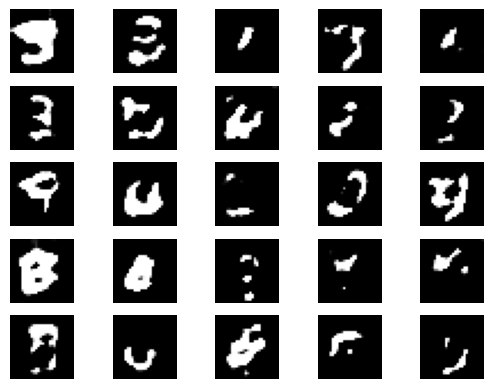

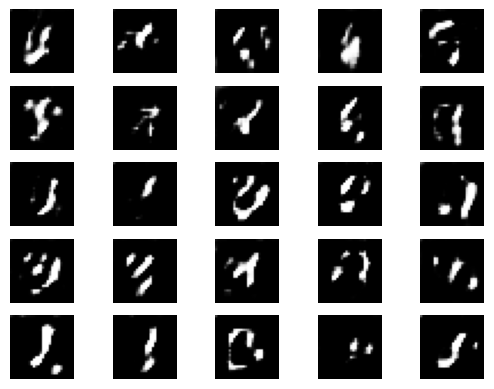

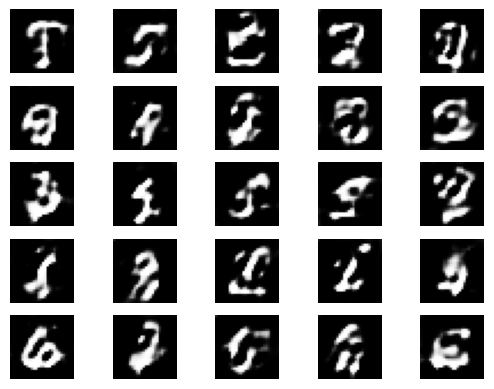

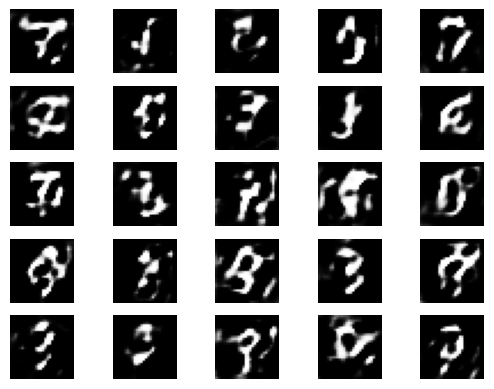

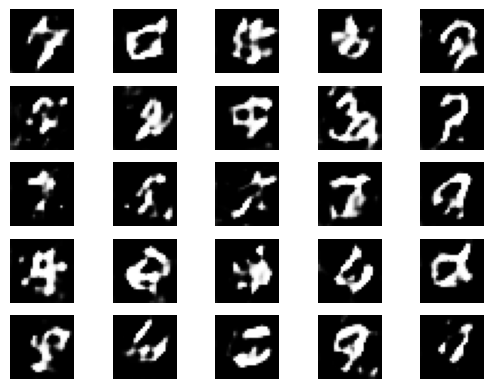

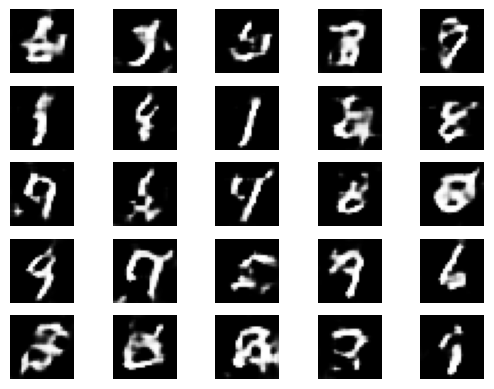

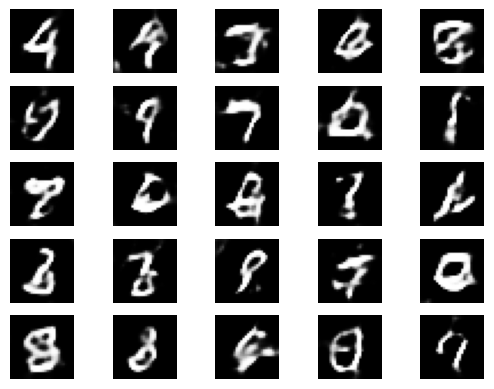

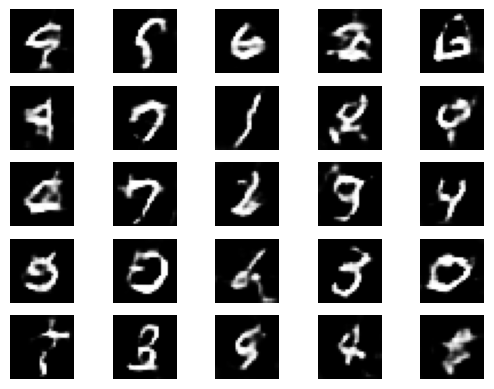

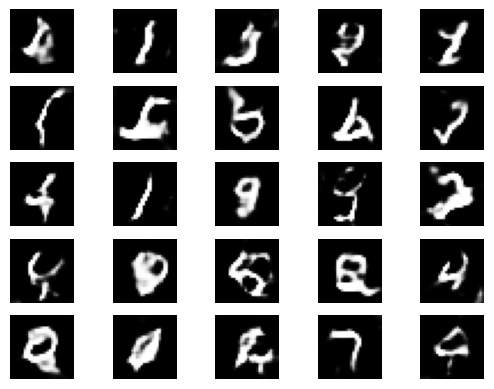

In [2]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.

## 4. 이미지의 특징을 추출하는 오토인코더

### 실습: 오토인코더 실습하기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)          

In [ ]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()

Epoch 1/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2140 - val_loss: 0.1357
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1257 - val_loss: 0.1169
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1139 - val_loss: 0.1093
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1080 - val_loss: 0.1047
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1042 - val_loss: 0.1012
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1013 - val_loss: 0.0988
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0993 - val_loss: 0.0972
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0978 - val_loss: 0.0960
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0966 - val_loss: 0.0950
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0956 - val_lo